# Code 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df = pd.read_csv('/content/titanic.csv')

### Basic Data Overview

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### Pair Plot for Titanic Dataset

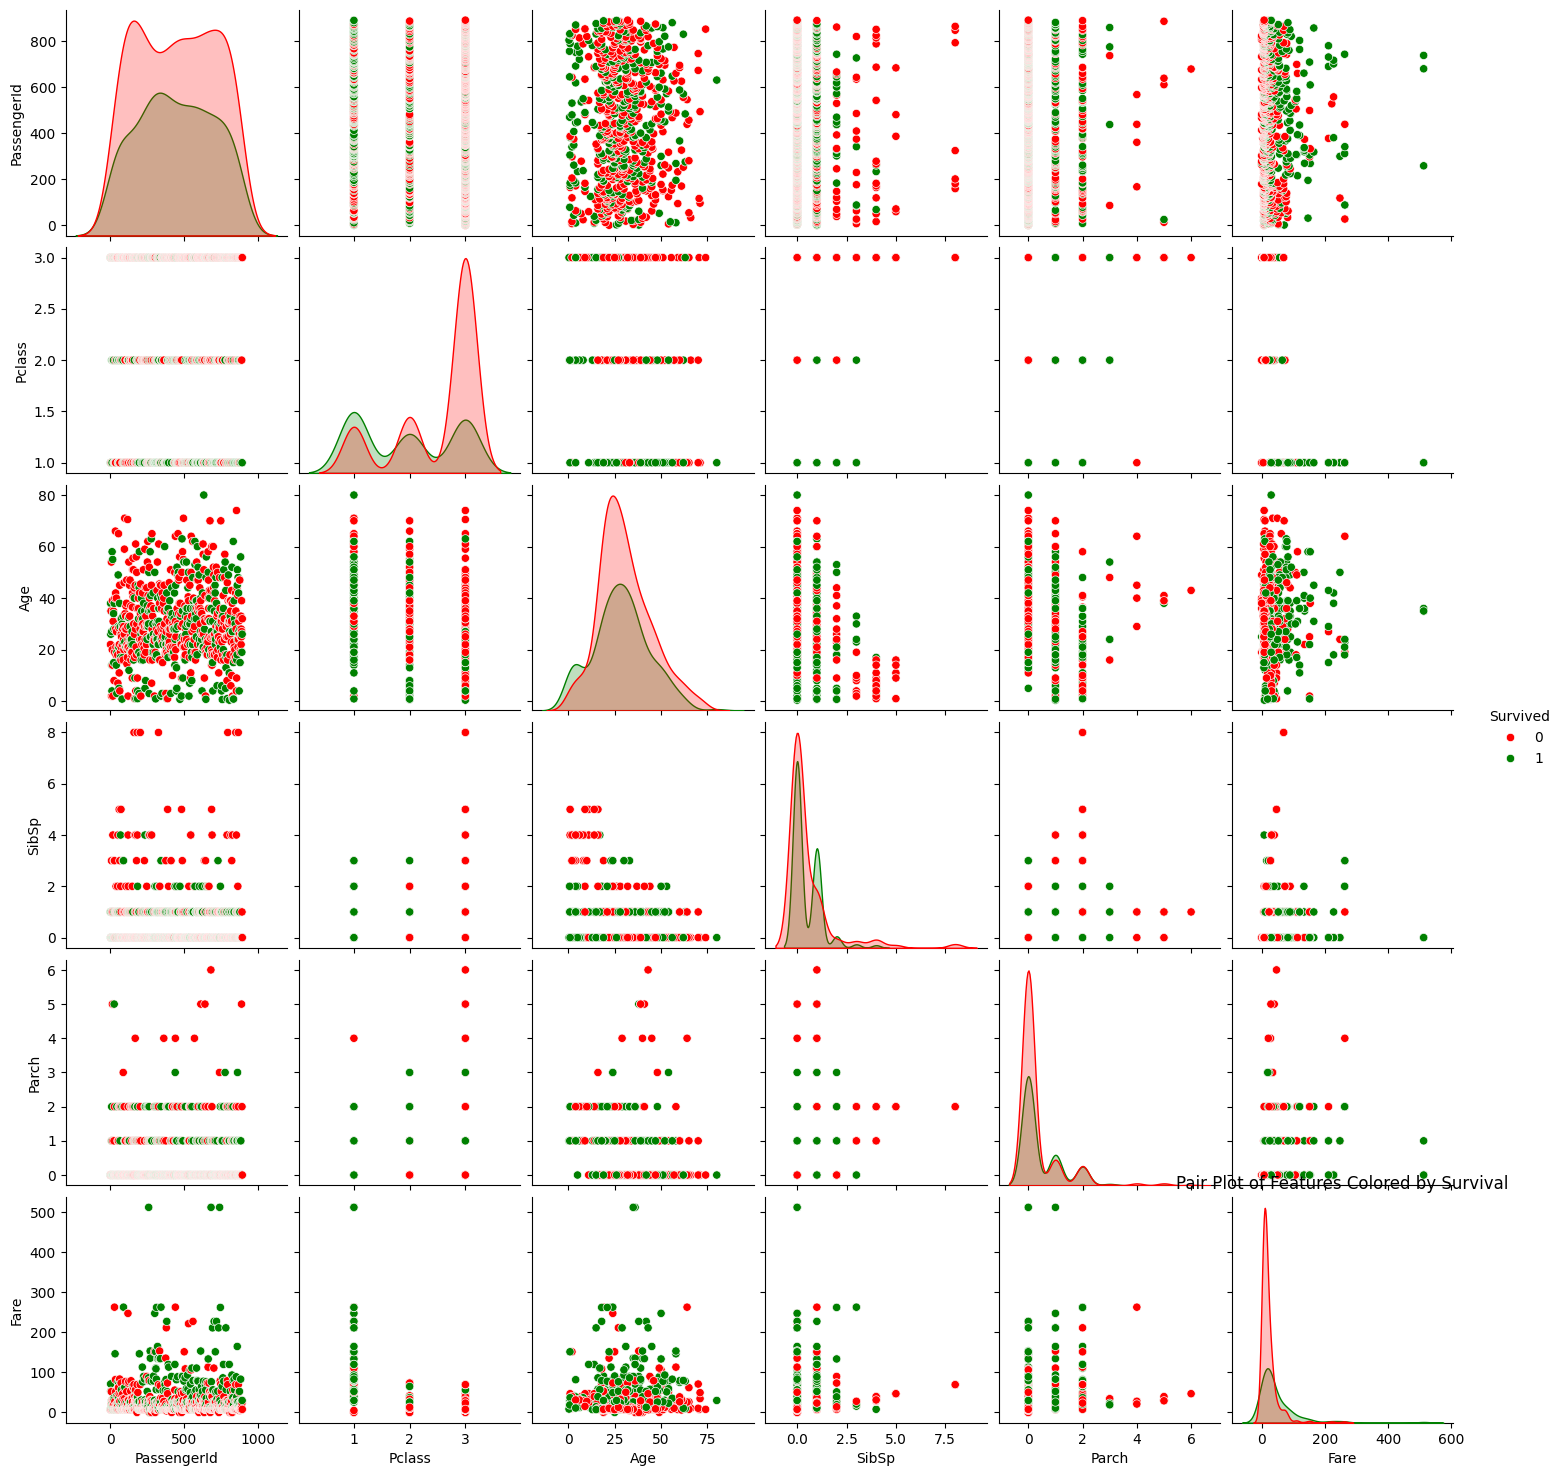

In [ ]:
sns.pairplot(df, hue='Survived', palette={0: 'red', 1: 'green'}, diag_kind='kde')
plt.title('Pair Plot of Features Colored by Survival')
plt.show()

### Handling Missing Values

In [ ]:
print("Missing Values Before Handling:\n", df.isna().sum())

Missing Values Before Handling:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.drop(columns=['Cabin'], inplace=True)  # Drop sparse column

In [ ]:
print("\nMissing Values After Handling:\n", df.isna().sum())


Missing Values After Handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Feature Engineering

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [ ]:
df['IsAlone'] = (df['FamilySize']==1).astype(int)

In [ ]:
df.drop(columns=['SibSp', 'Parch'])

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,2.110213,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,4.280593,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,2.188856,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,3.990834,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,2.202765,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,2.639057,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,3.433987,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,W./C. 6607,3.196630,S,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,3.433987,C,1,1


### Drop Irrelevant Columns

In [ ]:
df.drop(columns=['Name', 'Ticket'], inplace=True)

### Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

### Correlation Matrix

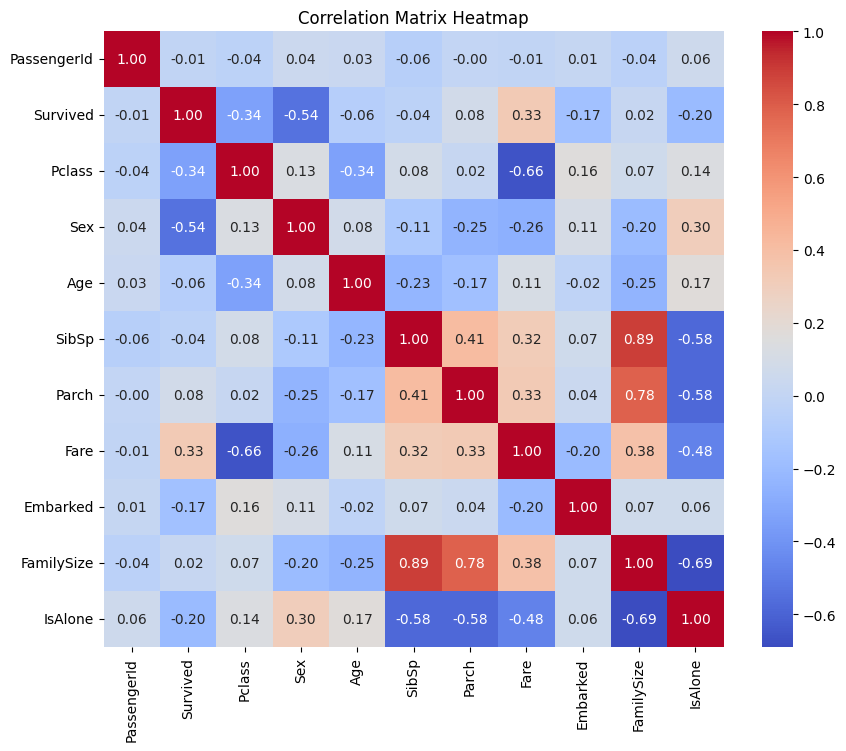

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

### Feature Scaling

In [ ]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

### Final Dataset Overview

In [ ]:
print(df.head())

   PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch      Fare  \
0            1         0       3    1 -0.565736      1      0 -0.879741   
1            2         1       1    0  0.663861      1      0  1.361220   
2            3         1       3    0 -0.258337      0      0 -0.798540   
3            4         1       1    0  0.433312      1      0  1.062038   
4            5         0       3    1  0.433312      0      0 -0.784179   

   Embarked  FamilySize  IsAlone  
0         2           2        0  
1         0           2        0  
2         2           1        1  
3         2           2        0  
4         2           1        1  


In [ ]:
print(df.describe())

       PassengerId    Survived      Pclass         Sex           Age  \
count   891.000000  891.000000  891.000000  891.000000  8.910000e+02   
mean    446.000000    0.383838    2.308642    0.647587  2.272780e-16   
std     257.353842    0.486592    0.836071    0.477990  1.000562e+00   
min       1.000000    0.000000    1.000000    0.000000 -2.224156e+00   
25%     223.500000    0.000000    2.000000    0.000000 -5.657365e-01   
50%     446.000000    0.000000    3.000000    1.000000 -1.046374e-01   
75%     668.500000    1.000000    3.000000    1.000000  4.333115e-01   
max     891.000000    1.000000    3.000000    1.000000  3.891554e+00   

            SibSp       Parch          Fare    Embarked  FamilySize  \
count  891.000000  891.000000  8.910000e+02  891.000000  891.000000   
mean     0.523008    0.381594 -1.714553e-16    1.536476    1.904602   
std      1.102743    0.806057  1.000562e+00    0.791503    1.613459   
min      0.000000    0.000000 -3.058578e+00    0.000000    1.000000

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   FamilySize   891 non-null    int64  
 10  IsAlone      891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB
None
